# Camera Calibration

Following the tutorial available at https://docs.opencv.org/3.3.1/dc/dbb/tutorial_py_calibration.html

## Setup

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
#make matplotlib figures appear inline in the notebook
#rather than in a new window.
%matplotlib inline
# set default size of plots
plt.rcParams['figure.figsize'] = (12.0, 10.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#print OpenCV version
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.3.1 


In [3]:
# the notebook will reload external python modules;
%load_ext autoreload
%autoreload 2

In [4]:
frame_step = 1
images_path = '../data/calibration_test/'

In [5]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [6]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

../data/calibration_test/image_dist_1.jpg


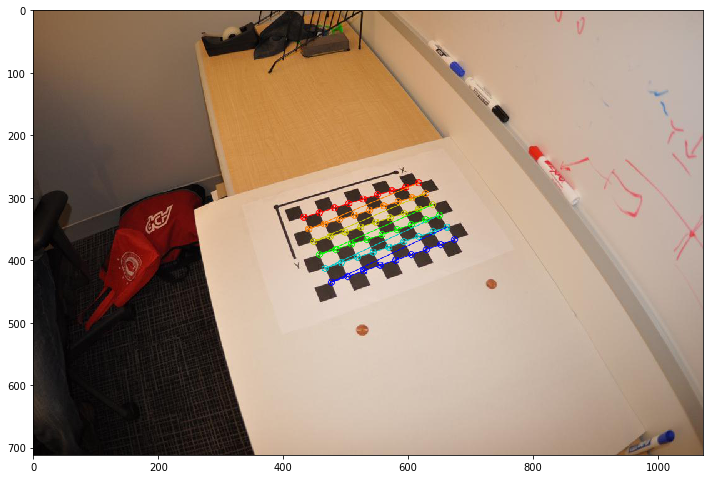

../data/calibration_test/image_dist_2.jpg


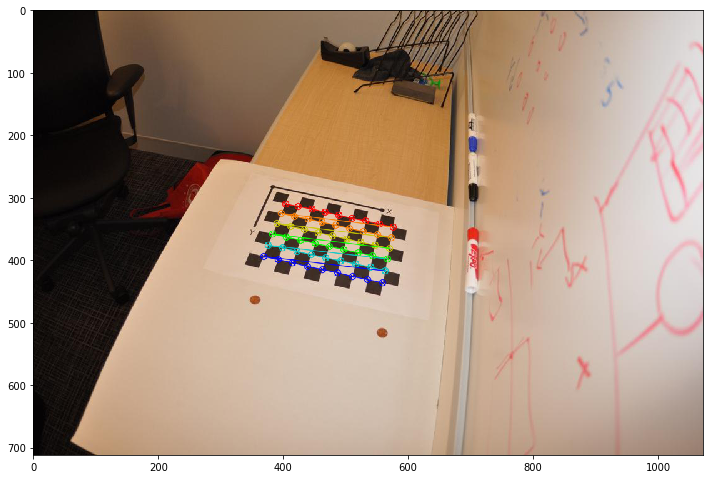

../data/calibration_test/image_dist_3.jpg


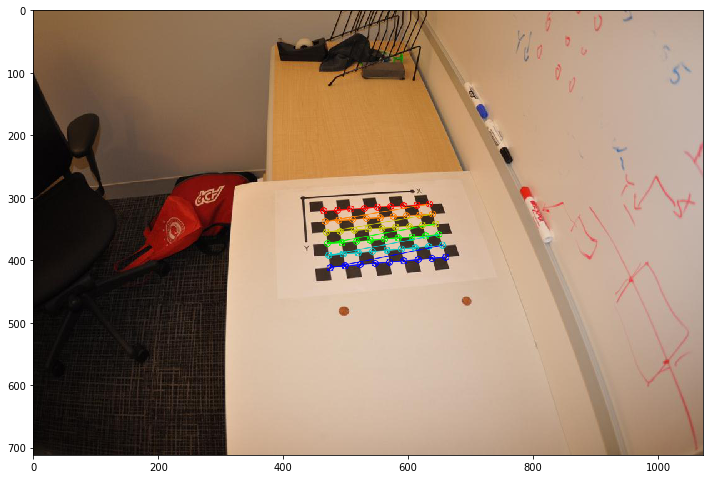

../data/calibration_test/image_dist_4.jpg


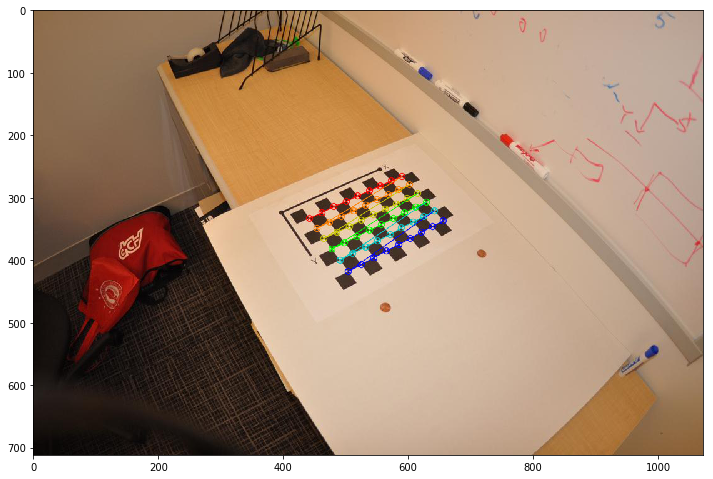

../data/calibration_test/image_dist_5.jpg


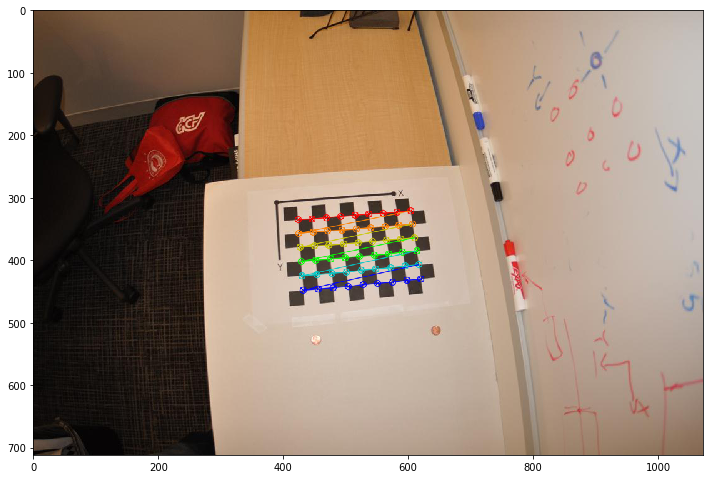

../data/calibration_test/image_dist_6.jpg


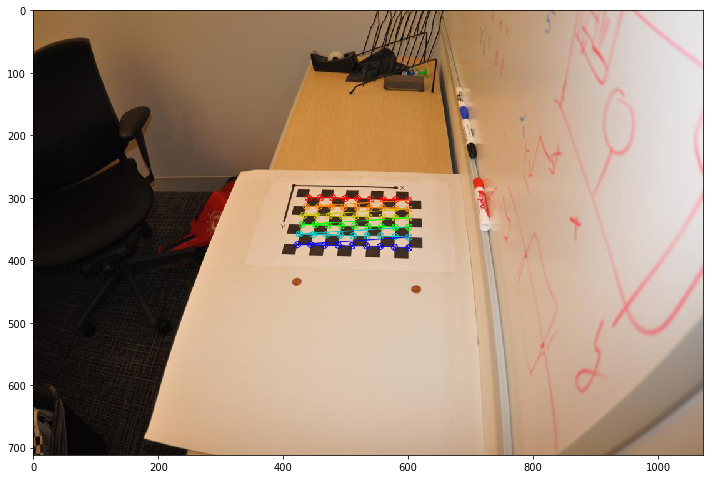

../data/calibration_test/image_dist_7.jpg


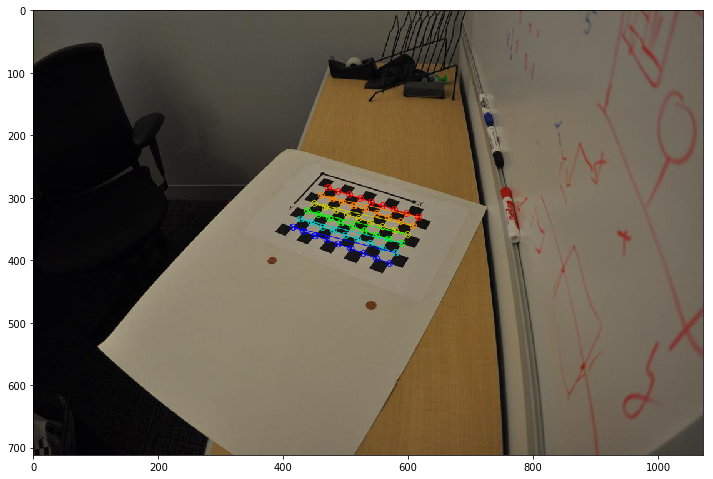

../data/calibration_test/image_dist_8.jpg


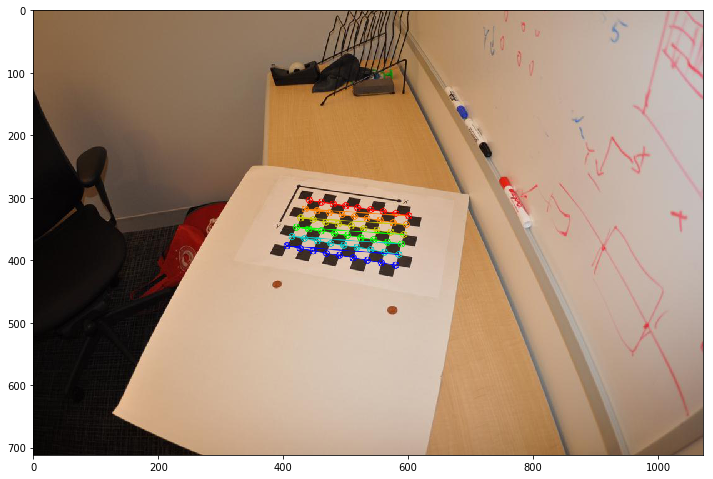

../data/calibration_test/image_dist_9.jpg


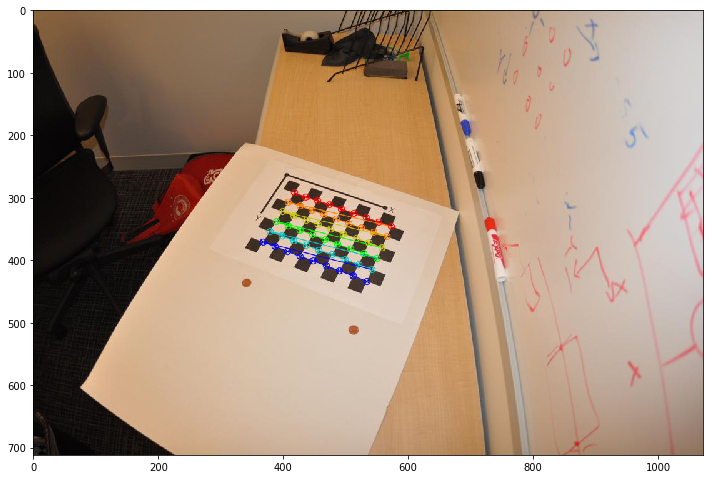

../data/calibration_test/image_dist_10.jpg


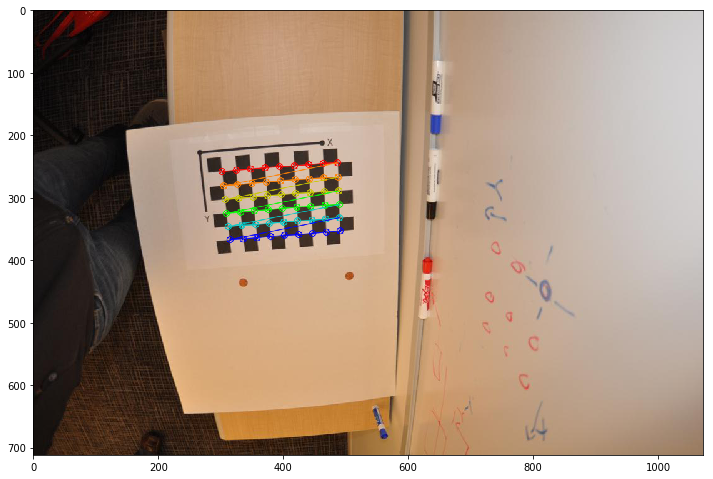

../data/calibration_test/image_dist_11.jpg
image not found!


In [27]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

i = 0
#initilializing loop with a random numpy array
img = np.random.rand(3,2)
while img.any():
    
    i+=1
    
    img_name = images_path+'image_dist_'+str(i*frame_step)+'.jpg'
    print(img_name)
    
    img = cv2.imread(img_name)
    
    try:        
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    except:
        print('image not found!')
        break            

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
                
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners2,ret)
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        plt.show()        

In [29]:
imgpoints

[array([[[433.45663, 330.7518 ]],
 
        [[457.59842, 323.57355]],
 
        [[481.50363, 316.12286]],
 
        [[505.1453 , 309.11783]],
 
        [[528.35986, 302.1744 ]],
 
        [[551.3003 , 295.39807]],
 
        [[573.62616, 288.98853]],
 
        [[595.5396 , 282.64105]],
 
        [[616.95184, 276.45316]],
 
        [[441.34686, 350.0428 ]],
 
        [[465.87433, 342.37363]],
 
        [[490.32922, 334.87637]],
 
        [[514.299  , 327.58533]],
 
        [[537.9573 , 320.1529 ]],
 
        [[561.2741 , 313.15112]],
 
        [[583.9093 , 306.3049 ]],
 
        [[606.1917 , 299.72467]],
 
        [[627.78265, 293.1904 ]],
 
        [[449.4992 , 370.15936]],
 
        [[474.56274, 362.33218]],
 
        [[499.34634, 354.52817]],
 
        [[523.73975, 346.7707 ]],
 
        [[547.7417 , 339.37234]],
 
        [[571.4107 , 331.87302]],
 
        [[594.454  , 324.63098]],
 
        [[616.92664, 317.53314]],
 
        [[638.9274 , 310.55212]],
 
        [[458.0972 , 390.842

## Calibration

We use the function, cv2.calibrateCamera(). It returns the camera matrix, distortion coefficients, rotation and translation vectors etc.

In [30]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

## Undistortion

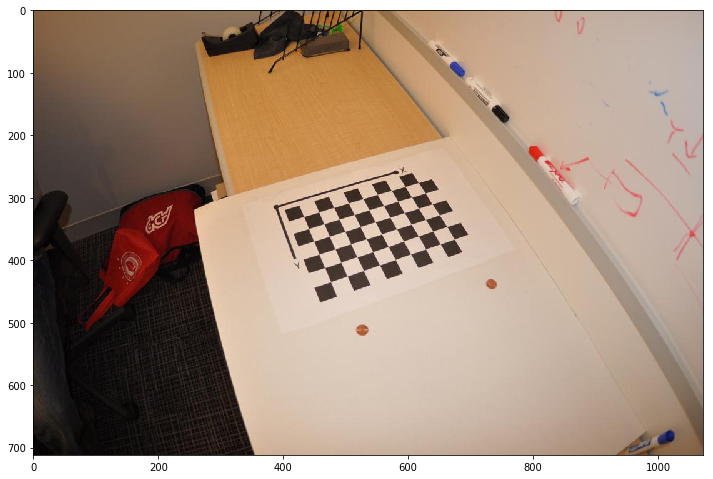

In [31]:
img = cv2.imread('../data/calibration_test/image_dist_1.jpg')
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
#display image
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show() 

In [32]:
mtx

array([[733.48150238,   0.        , 575.60842738],
       [  0.        , 733.72894656, 346.82997627],
       [  0.        ,   0.        ,   1.        ]])

In [33]:
newcameramtx

array([[543.4854126 ,   0.        , 584.55575607],
       [  0.        , 592.47906494, 350.72126635],
       [  0.        ,   0.        ,   1.        ]])

* Using cv2.undistort()

In [34]:
roi

(0, 0, 0, 0)

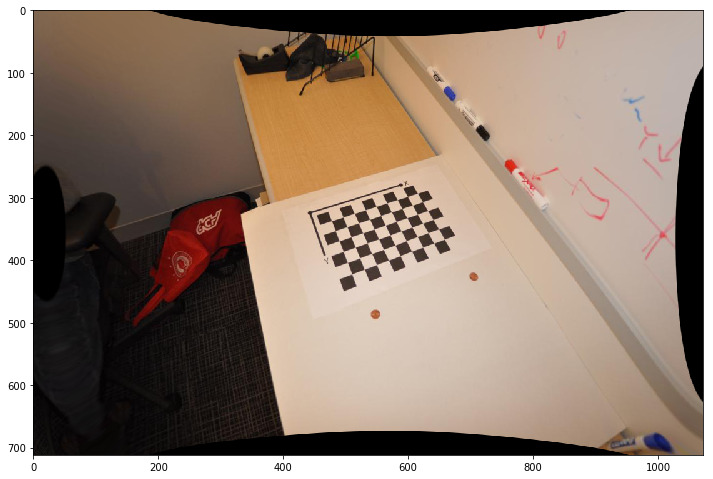

In [36]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# crop the image
x, y, w, h = roi
#dst = dst[y:y+h, x:x+w]
plt.imshow(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB))
plt.show()

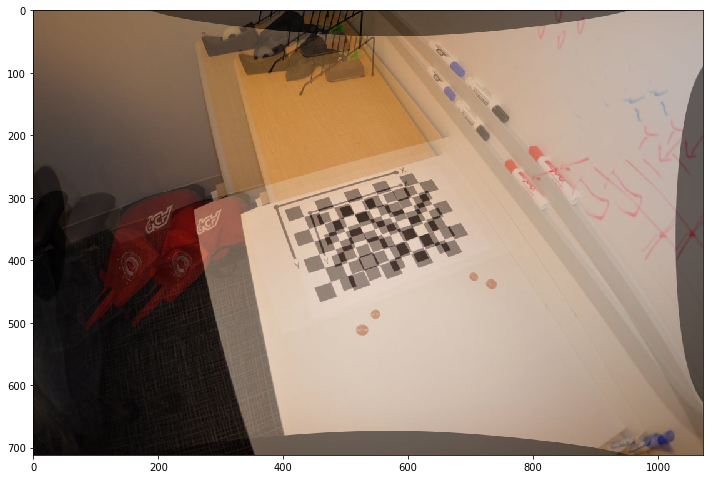

In [37]:
blend = cv2.addWeighted(img,0.5,dst,0.5,0)
plt.imshow(cv2.cvtColor(blend,cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
#TODO: * using remapping

## Re-projection Error

In [40]:
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error
print( "total error: {}".format(mean_error/len(objpoints)) )

total error: 0.031195359861033344
